In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

In [2]:
spcolor = 'orange'
dcolor = 'skyblue'

## Part I

In [31]:
n = 100
m = 200

# generate all possible edges in the graph
edges = [(i, j) for i in range(n) for j in range(i+1, n)]

# randomly choose m unique edges
chosen_edges = set(random.sample(edges, m))

# initialize adjacency matrix with all zeros
adj_matrix = [[0]*n for _ in range(n)]

# set ones for chosen edges
for i, j in chosen_edges:
    adj_matrix[i][j] = 1
    adj_matrix[j][i] = 1

In [32]:
a = np.array(adj_matrix)

In [33]:
am = pd.DataFrame(a)
am

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
adj_list = [[] for _ in range(len(a))]
for i in range(len(a)):
    neighbors = np.where(a[i] == 1)[0]
    adj_list[i] = neighbors.tolist()

In [29]:
al = pd.DataFrame(adj_list).fillna(' ')
al

,0,1,2,3,4,5,6,7,8
0,30.0,55.0,,,,,,,
1,61.0,,,,,,,,
2,70.0,,,,,,,,
3,20.0,37.0,47.0,87.0,,,,,
4,13.0,41.0,42.0,,,,,,
...,...,...,...,...,...,...,...,...,...
95,20.0,60.0,89.0,,,,,,
96,17.0,19.0,21.0,36.0,44.0,59.0,86.0,,
97,8.0,13.0,46.0,76.0,78.0,89.0,,,
98,41.0,,,,,,,,


In [9]:
rows, cols = np.where(a == 1)
edges = zip(rows.tolist(), cols.tolist())
gr = nx.Graph()
gr.add_edges_from(edges)
pos = nx.spring_layout(gr)

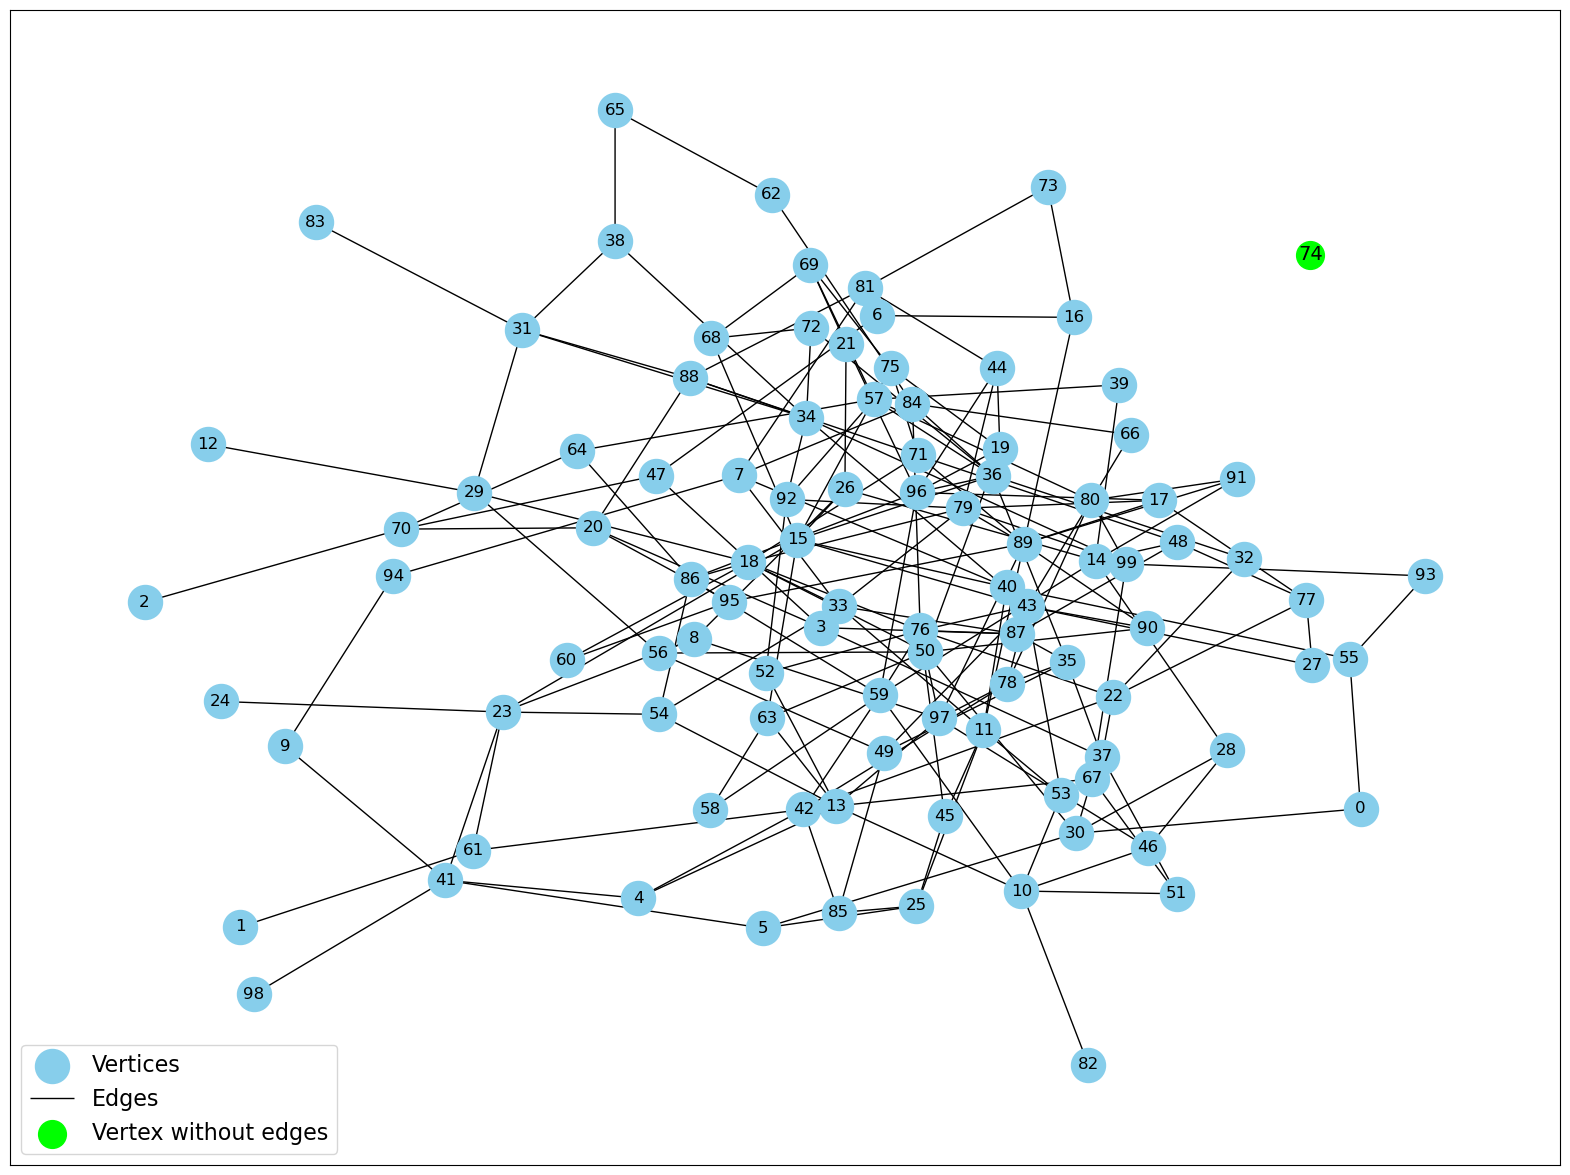

In [34]:
plt.figure(figsize=(20,15))
nx.draw_networkx_nodes(gr, pos=pos, node_size=600, label='Vertices', node_color=dcolor)
nx.draw_networkx_edges(gr, pos=pos,  label='Edges')
nx.draw_networkx_labels(gr, pos=pos)
plt.scatter(0.6, 0.7, s=400, color='lime', label='Vertex without edges')
plt.annotate('74', (0.6, 0.7), (0.585, 0.69), fontsize=14)
plt.legend(fontsize=16, loc='lower left')
plt.show()

## Part II

In [11]:
#Transform adjacency list to dictionary
dictal = dict()
for i in range(len(adj_list)):
    dictal[i] = adj_list[i]

In [12]:
# Define DFS function
def dfs(vertex, component):
    visited[vertex] = True
    component.append(vertex)
    for neighbor in dictal[vertex]:
        if not visited[neighbor]:
            dfs(neighbor, component)

In [13]:
# Find all connected components
visited = [False] * 100
components = []
for vertex in range(len(dictal)):
    if not visited[vertex]:
        component = []
        dfs(vertex, component)
        components.append(component)

In [14]:
# Print connected components
for i in range(len(components)):
    print('Connected components group {}: {}'.format(i + 1, components[i]))

Connected components group 1: [0, 30, 5, 25, 11, 33, 7, 40, 15, 23, 8, 26, 14, 28, 46, 10, 13, 4, 41, 9, 94, 98, 42, 22, 32, 36, 35, 37, 3, 20, 70, 2, 47, 6, 16, 73, 81, 44, 19, 50, 18, 29, 12, 31, 34, 38, 65, 62, 84, 66, 43, 27, 77, 17, 79, 89, 71, 48, 87, 76, 45, 52, 92, 57, 39, 64, 86, 54, 59, 58, 63, 96, 21, 69, 68, 72, 75, 80, 78, 97, 91, 99, 67, 51, 93, 55, 88, 90, 95, 60, 49, 56, 85, 53, 83, 61, 1, 82, 24]
Connected components group 2: [74]


In [15]:
# Choose random two points to find chortest path
two_vertices = np.random.choice(components[0], 2)
two_vertices

array([36, 25])

In [16]:
def bfs(start, end):
    queue = [(start, [start])]
    visited = set(start)

    while queue:
        (vertex, path) = queue.pop(0)
        for neighbor in graph[vertex]:
            if neighbor not in visited:
                if neighbor == end:
                    return path + [neighbor]
                else:
                    queue.append((neighbor, path + [neighbor]))
                    visited.add(neighbor)

    return None

In [17]:
def shortest_path(graph, node1, node2):
    path_list = [[node1]]
    path_index = 0
    # To keep track of previously visited nodes
    previous_nodes = {node1}
    if node1 == node2:
        return path_list[0]
        
    while path_index < len(path_list):
        current_path = path_list[path_index]
        last_node = current_path[-1]
        next_nodes = graph[last_node]
        # Search goal node
        if node2 in next_nodes:
            current_path.append(node2)
            return current_path
        # Add new paths
        for next_node in next_nodes:
            if not next_node in previous_nodes:
                new_path = current_path[:]
                new_path.append(next_node)
                path_list.append(new_path)
                # To avoid backtracking
                previous_nodes.add(next_node)
        # Continue to next path in list
        path_index += 1
    # No path is found
    return []

In [18]:
res = shortest_path(dictal, two_vertices[0], two_vertices[1])

In [19]:
res

[36, 15, 40, 11, 25]

In [20]:
nc = []

In [21]:
for i in list(gr.nodes()):
    if i in res:
        nc.append(spcolor)
    else:
        nc.append(dcolor)

In [22]:
el = []
for i in range(len(res) - 1):
    el.append((res[i], res[i+1]))

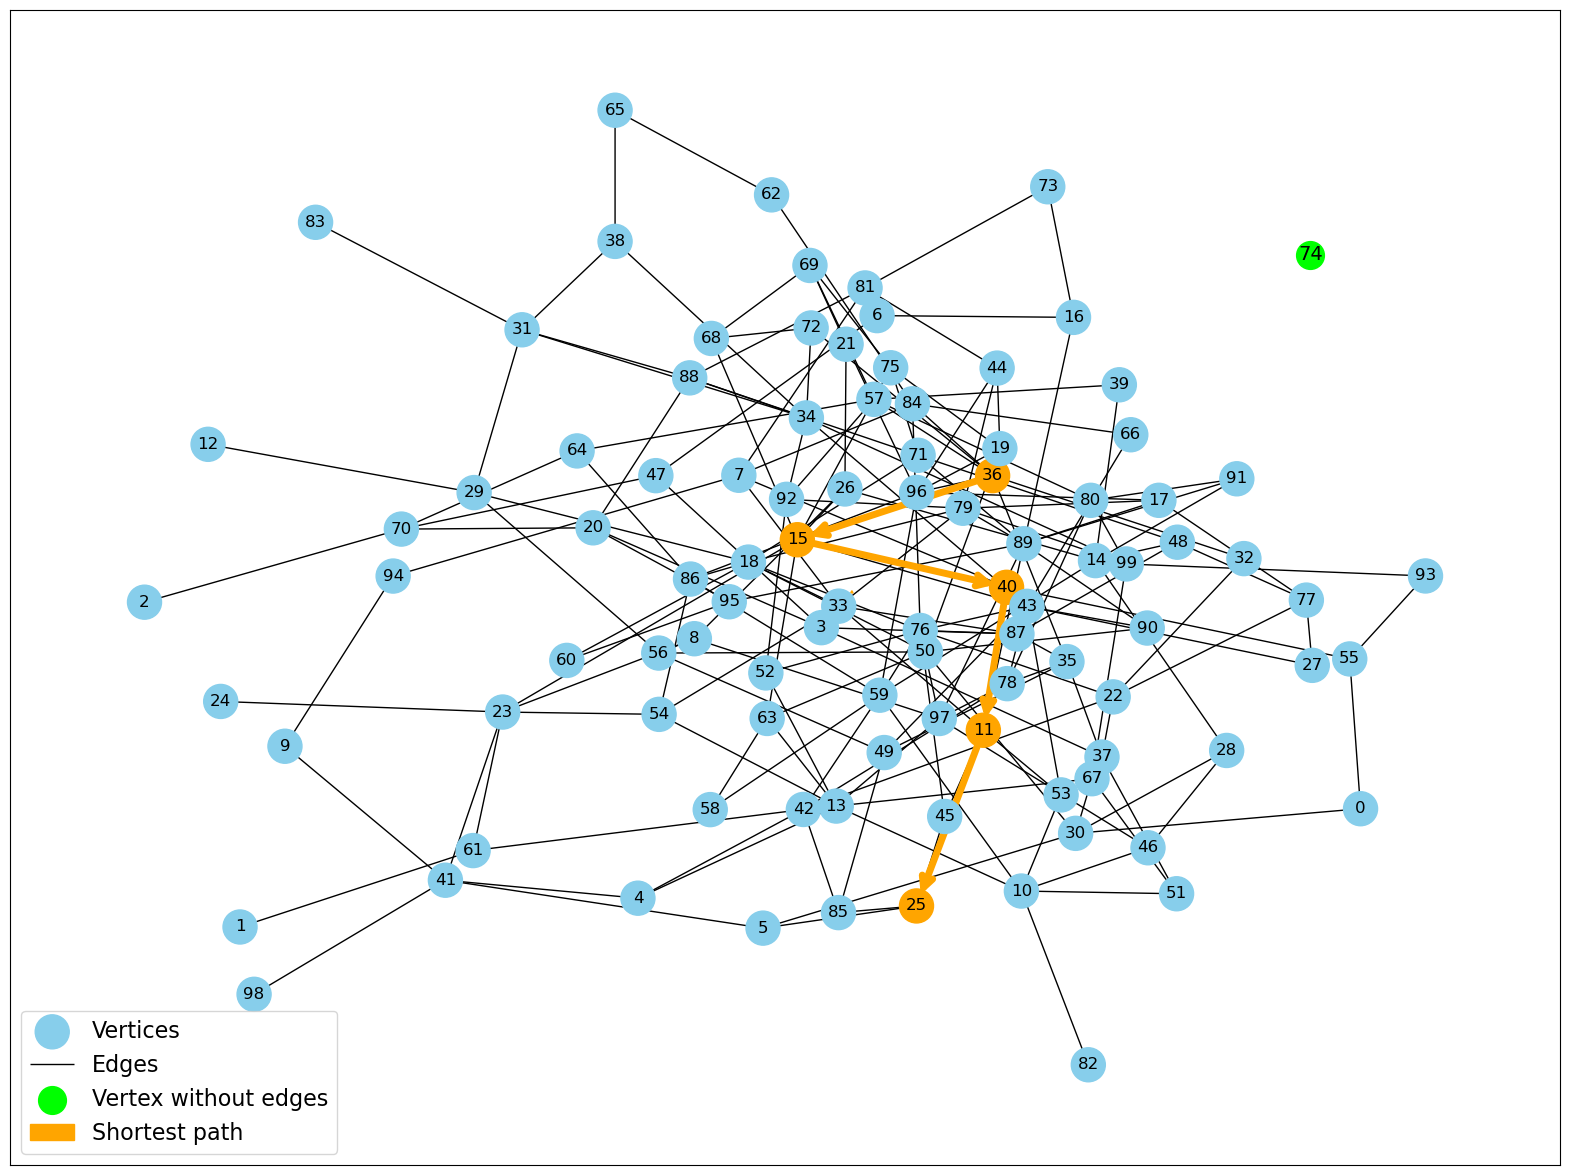

In [25]:
plt.figure(figsize=(20,15))
nx.draw_networkx_nodes(gr, pos=pos, node_size=600, node_color=nc, label='Vertices')
nx.draw_networkx_edges(gr, pos=pos,  label='Edges')
nx.draw_networkx_edges(gr, pos=pos, edgelist=el,  label='a', edge_color=spcolor, 
                       width=5, arrows=True, arrowsize=20, arrowstyle='->')
nx.draw_networkx_labels(gr, pos=pos)
plt.scatter(0.6, 0.7, s=400, color='lime', label='Vertex without edges')
plt.arrow(0,0,0,0, label='Shortest path', color='orange')
plt.annotate('74', (0.6, 0.7), (0.585, 0.69), fontsize=14)
plt.legend(fontsize=16, loc='lower left')
plt.show()